**Detection Of Cyber-Bulling Incidents On Instagram Social Network**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud

In [2]:
# Loading the data

from google.colab import files
uploaded = files.upload()

Saving Train_instagramupdated.csv to Train_instagramupdated (2).csv


In [3]:
# Getting the data

df=pd.read_csv('Train_instagramupdated.csv')

In [4]:
#Displaying first 10 Comments

df.head(10)

,Neutral,Comments
0,Positive,Explore St. Moritz with Fabio Zingg on our Ins...
1,Neutral,Driving home with the beach 🏄 #TheWeekOnInstag...
2,Neutral,"Oh, hello Liouba the cat. We didn’t see you up..."
3,Neutral,The Week on Instagram |https://t.co/jLYH93yx0h
4,Neutral,Participate in this weekend’s hashtag project:...
5,Neutral,"Nature, literature and photography collide #my..."
6,Neutral,232 toy cars work together for #myinstagramlog...
7,Neutral,A sweet treat born from a creative block #myin...
8,Neutral,Free as a bird 🕊 #TheWeekOnInstagram https://t...
9,Neutral,Today’s #WeeklyFluff is a crew of three canine...


In [5]:
# Converting to list

df['data'] = df.Comments.tolist()
data=df['data']

In [6]:
#Displaying data

data

0      Explore St. Moritz with Fabio Zingg on our Ins...
1      Driving home with the beach 🏄 #TheWeekOnInstag...
2      Oh, hello Liouba the cat. We didn’t see you up...
3         The Week on Instagram |https://t.co/jLYH93yx0h
4      Participate in this weekend’s hashtag project:...
                             ...                        
223    Just a normal day at the pool. #TheWeekOnInsta...
224    This little monkey-pup sees, hears and speaks ...
225    Coming in for a landing 🐝 #TheWeekOnInstagram ...
226    Laundry swaying on the line caught our eye for...
227    Participate in this weekend’s hashtag project:...
Name: data, Length: 228, dtype: object

In [7]:
# Pre-processing steps for data

df['data'] = [re.sub('\s*@\s*\s?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\_', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('@"[\d-]"', ' ', str(sent)) for sent in df['data']]

# Remove new line characters
df['data'] = [re.sub('\s+', ' ', str(sent)) for sent in df['data']]

# Remove distracting single quotes
df['data'] = [re.sub("\'", " ", str(sent)) for sent in df['data']]

#Converting into lowercase
df['data']=df['data'].str.lower()

In [8]:
#Remove Emojis from column comments_text

df['data'] = df['data'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [9]:
#Displaying data

df['data']

0      explore st. moritz with fabio zingg on our ins...
1      driving home with the beach  #theweekoninstagr...
2      oh, hello liouba the cat. we didnt see you up ...
3          the week on instagram https://t.co/jlyh93yx0h
4      participate in this weekends hashtag project: ...
                             ...                        
223    just a normal day at the pool. #theweekoninsta...
224    this little monkey-pup sees, hears and speaks ...
225    coming in for a landing  #theweekoninstagram h...
226    laundry swaying on the line caught our eye for...
227    participate in this weekends hashtag project: ...
Name: data, Length: 228, dtype: object

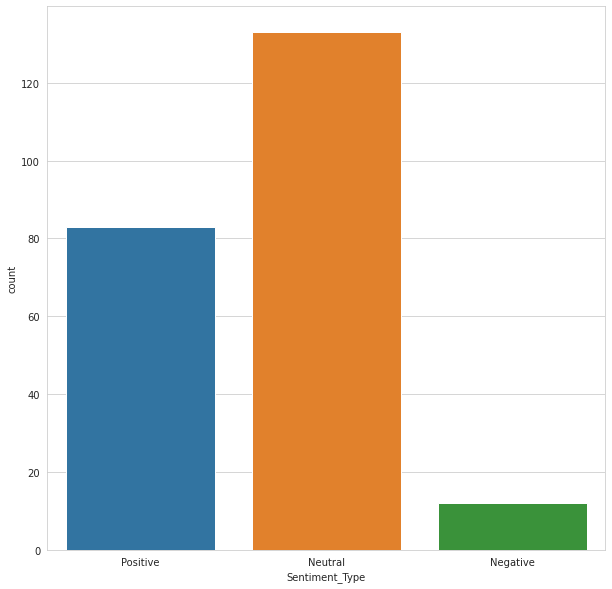

In [10]:
#Plotting

from textblob import TextBlob

bloblist_desc = list()

df_comments=df['data'].astype(str)
for row in df_comments:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_comments_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_comments_polarity_desc):
    if df_comments_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_comments_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_comments_polarity_desc['Sentiment_Type'] = df_comments_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_comments_polarity_desc)

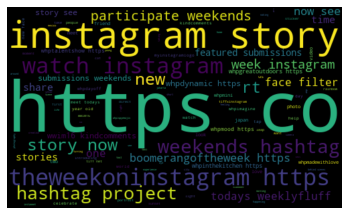

In [11]:
# word cloud visualization

allWords = ' '.join([twts for twts in df['data']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# ***Thank You!***